Predicting wine quality using Random forest model

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [52]:
data = pd.read_csv('/content/winequality-red.csv')

In [53]:
data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [54]:
data.info()
# (shape = (1599,12))
# no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [55]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Number of values for each quality of wine**

In [56]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Data Visualisation

<Axes: xlabel='quality', ylabel='count'>

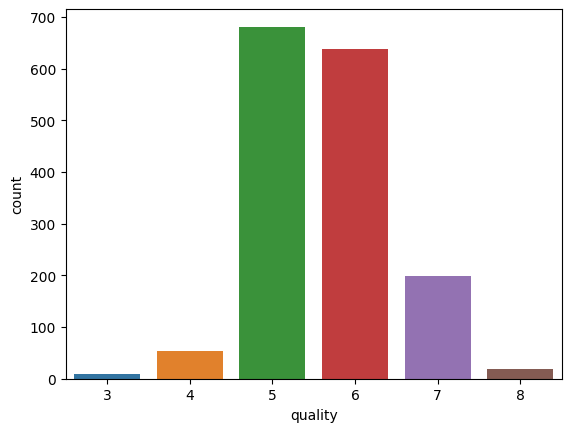

In [57]:
sns.countplot(x='quality', data=data,)

# Plotting multiple graphs to check the correlation struture

<Axes: xlabel='quality', ylabel='volatile acidity'>

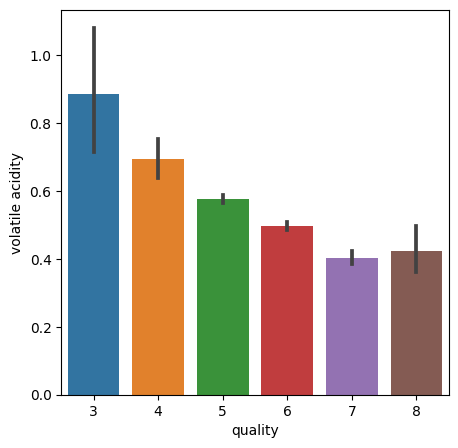

In [58]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=data)

<Axes: xlabel='quality', ylabel='citric acid'>

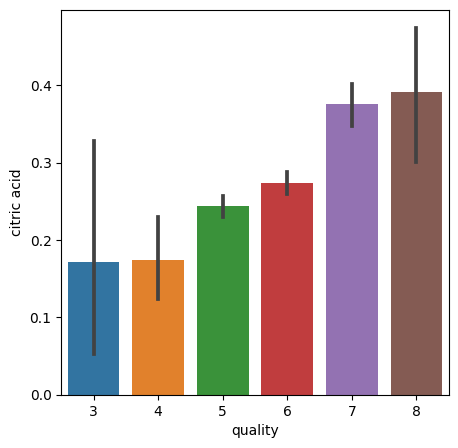

In [59]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=data)

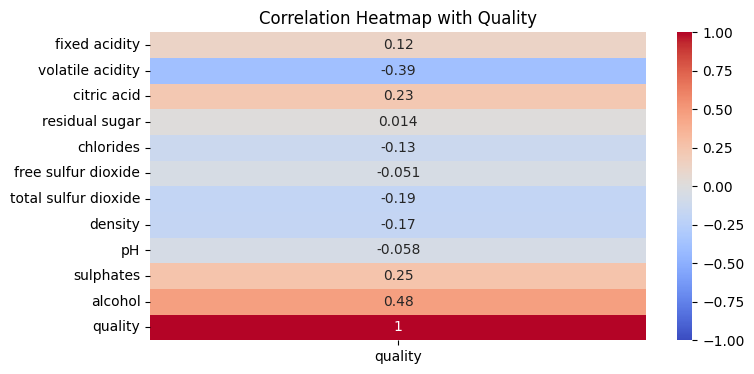

In [60]:
corr_matrix = data.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix[['quality']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with Quality')
plt.show()

# data.corr(): This calculates the correlation matrix for all numeric columns in your DataFrame.
# corr_matrix[['quality']]: This selects the correlation values between all columns and the 'quality' column.
# sns.heatmap(): This creates a heatmap using Seaborn to visualize the correlation matrix.
# annot=True: This adds the numerical values in each cell of the heatmap.
# cmap='coolwarm': This sets the color map for the heatmap.
# vmin and vmax: These set the minimum and maximum values for the color scale. Setting them to -1 and 1 ensures that the colors represent the full range of correlation values (-1 being strong negative correlation, 1 being strong positive correlation).

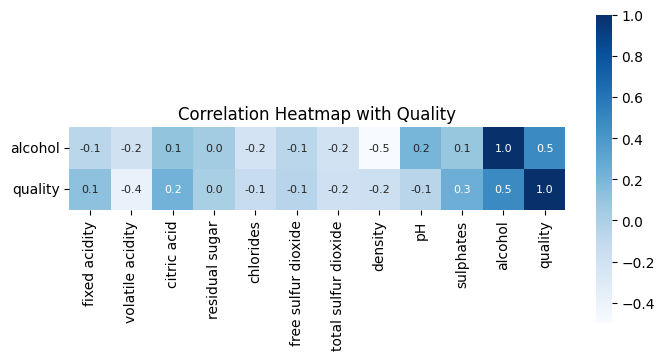

In [61]:
plt.figure(figsize=(8, 4))
filtered_corr = corr_matrix[(corr_matrix['quality'] > 0.4) | (corr_matrix['quality'] < -0.4)]
sns.heatmap(filtered_corr, annot=True, cmap='Blues', annot_kws={'size':8}, fmt='.1f', square=True, cbar=True)
plt.title('Correlation Heatmap with Quality')
plt.show()

In [62]:
# Filter correlations greater than 0.40 or lesser than -0.40
filtered_corr = corr_matrix[(corr_matrix['quality'] > 0.25) | (corr_matrix['quality'] < -0.25)]

print("Filtered Correlation Matrix:")
print(filtered_corr[['quality']])

Filtered Correlation Matrix:
                   quality
volatile acidity -0.390558
sulphates         0.251397
alcohol           0.476166
quality           1.000000


# Data Preprocesing

**Label Binarisation**

In [63]:
y = data['quality'].apply(lambda y_val: 1 if y_val >= 6 else 0)
# data['quality']: This extracts the 'quality' column from DataFrame data.
# .apply(lambda y_val: 1 if y_val >= 6 else 0): This applies a lambda function to each element in the 'quality' column

In [64]:
x = data.drop("quality", axis=1)

In [65]:
y.head()
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


# Splitting train and test data

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [67]:
print(len(x_train)/(len(x_train)+len(x_test)))

0.7998749218261413


# Model training


In [68]:
model = RandomForestClassifier()

In [69]:
model.fit(x_train, y_train)

RandomForestClassifier()

# Model Evaluation

In [70]:
# accuracy on test_data
x_test_pred = model.predict(x_test)
test_data_acc = accuracy_score(x_test_pred, y_test)
print('Accuracy on test data is:', test_data_acc)

Accuracy on test data is: 0.8125


# Building a predictioin system

In [71]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0) #label was 7 so output should be 1

# changing input data to a numpy array
input_data_as_np_arr = np.asarray(input_data)

# reshaping the data as we are only predicting only 1 instance.
input_data_rshp = input_data_as_np_arr.reshape(1, -1)

prediction = model.predict(input_data_rshp)

if (prediction[0] == 1):
  print('Quality of wine is good')
else:
  print('Quality is bad')

Quality of wine is good


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
